In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Line Chart

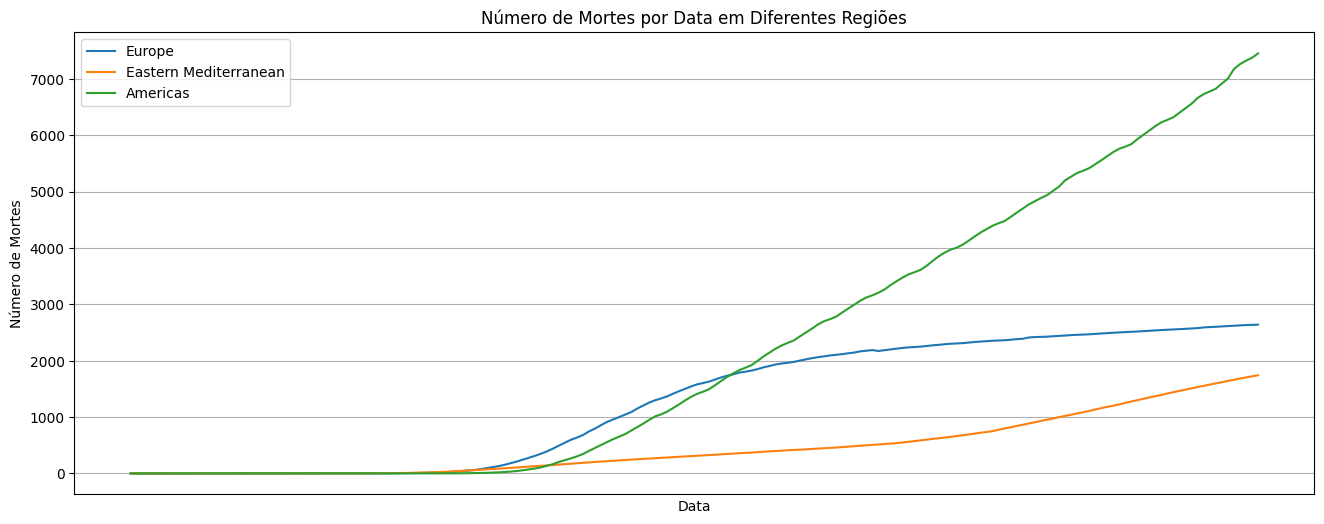

In [30]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

covid = pd.read_csv('/kaggle/input/corona-virus-report/covid_19_clean_complete.csv')
#Américas, Eastern Mediterran e Europe
a = ["Date", "Deaths", "WHO Region"]
covid0 = covid[a]
covid0
#df[df['WHO Region'] == 'Europe'

plt.figure(figsize=(16, 6))                 #Ajusta largura e altura

#sns.barplot(ax = ax0, x = "K", y = "mape", data = df_hist, hue="region",palette=access_color,errwidth=0.7)
sns.lineplot(x = "Date", y = "Deaths", data=covid0[covid0['WHO Region'] == 'Europe'], label= "Europe", errorbar=None)
sns.lineplot(x = "Date", y = "Deaths", data=covid0[covid0['WHO Region'] == 'Eastern Mediterranean'], label= "Eastern Mediterranean", errorbar=None)
sns.lineplot(x = "Date", y = "Deaths", data=covid0[covid0['WHO Region'] == 'Americas'], label= "Americas", errorbar=None)

plt.xticks([])         #Remove as Datas do gráfico (ficou muito ruim visualmente)
plt.grid(True)         # Adiciona o Grid

plt.title("Número de Mortes por Data em Diferentes Regiões")
plt.xlabel("Data")
plt.ylabel("Número de Mortes")
plt.legend()

### Bar Charts

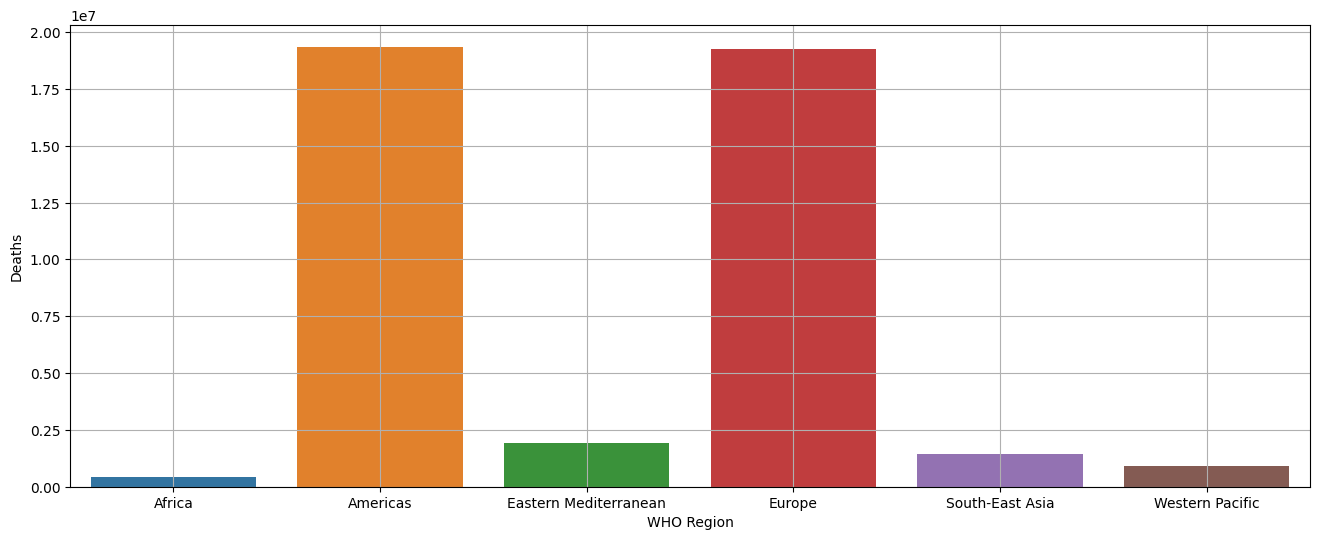

In [40]:
#Agrupando a tabela por continento com mais mortes

covid1 = covid0.groupby('WHO Region').sum()
colunas_para_excluir = ['Date']
covid1 = covid1.drop(colunas_para_excluir, axis=1)
covid1

plt.figure(figsize=(16, 6))  
sns.barplot(x=covid1.index, y=covid1['Deaths'])
plt.grid(True)

plt.show()

### Scatter Plots

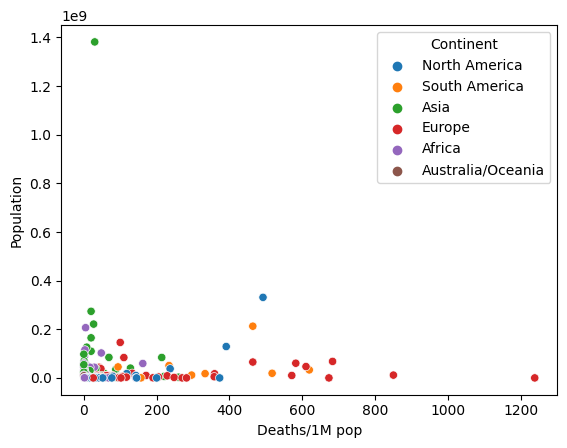

In [53]:
world = pd.read_csv("/kaggle/input/corona-virus-report/worldometer_data.csv")
world

#sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])
w = ['Continent', 'Population', 'Deaths/1M pop']
world0 = world[w]
world0
#sns.lineplot(x = "Date", y = "Deaths", data=covid0[covid0['WHO Region'] == 'Europe'], label= "Europe", errorbar=None)

sns.scatterplot(x=world0['Deaths/1M pop'], y=world0['Population'], hue=world0['Continent']) #data = ...)

plt.show()

### Heatmap de Correlação

In [57]:
world

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


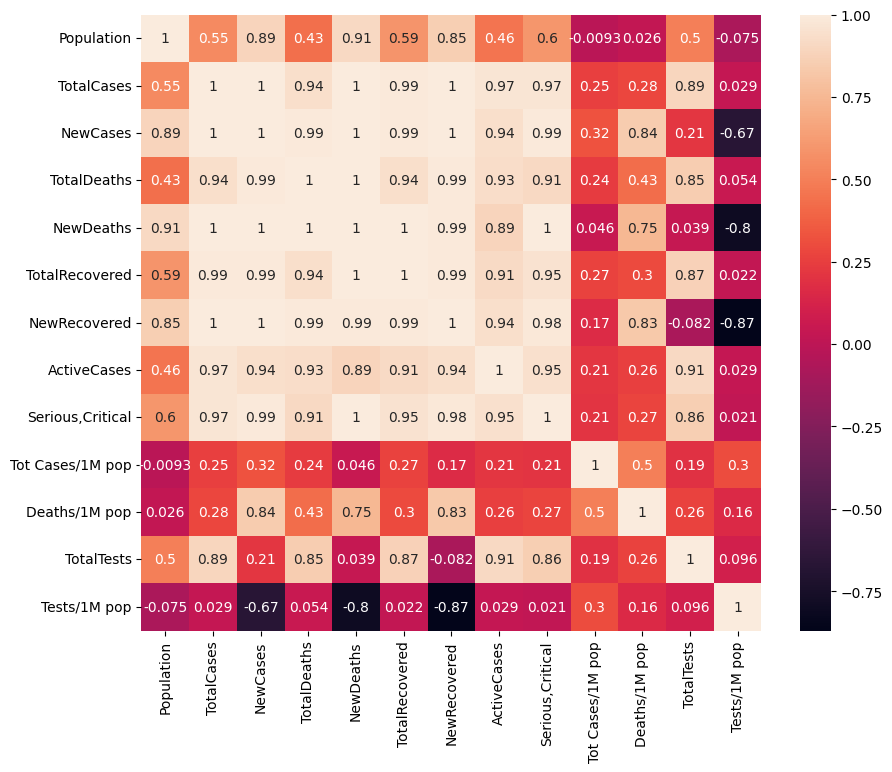

In [68]:
#“Population”, “Teste/1M pop”

world1= world.select_dtypes(include=['int64', 'float64'])
world2 = world1.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(data=world2, annot=True)

plt.show()